Step 1:
EDA STEPS:
1.Indexing data

2.Visualize data(check the statistical data for each column)

3.Barchart/piechart(default rate in different regions, default rate in different types)

4.Attribute(numeric(correlation),rank the top 10 correlation),
EDA
https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
simple histogram and distribution.

5. Correlation (with the target varaible)

Step 2:

pre-processing
missing value (impute(), delete)

understanding each column, understanding the relationship between feature and target

categorical varaible (onehot encoding)


Step 3:
Model:

1.Naive-Bayes

2.Logistic regression

3.Neuro Network

4.Decision tree

5. Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

6. Adaboost
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

Step 4:
Evaluate the model and compare it
cross_val_score
accuracy



In [1]:
##Thanks for Janio Alexander's code

##importing packages and data
import pandas as pd
import numpy as np
loan=pd.read_csv('/Users/taotao/Desktop/loan/loan.csv',low_memory=False)
loan_original=loan.copy()

##import packages for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

##visualize data
loan.head()
loan['loan_amnt'].sum()

13093511950.0

In [2]:
# Number of each type of column
loan.dtypes.value_counts()

float64    49
object     23
int64       2
dtype: int64

In [3]:
##drop some unrelated columns 
loan.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)

In [4]:
miss_data=loan.isnull().sum()
miss_data_ratio=(loan.isnull().sum()*100/len(loan))
miss_data_table=pd.DataFrame({'missing value':miss_data,'missing ratio':miss_data_ratio})
miss_data_table.loc[miss_data_table['missing ratio'] > 70].sort_values(by='missing value',ascending=False)

,missing value,missing ratio
dti_joint,886870,99.942640
annual_inc_joint,886868,99.942415
verification_status_joint,886868,99.942415
il_util,868762,97.902024
mths_since_rcnt_il,866569,97.654892
total_cu_tl,866007,97.591559
inq_fi,866007,97.591559
all_util,866007,97.591559
max_bal_bc,866007,97.591559
open_rv_24m,866007,97.591559


In [5]:
# dealing with missing value
# drop columns with over 70% of null values, those variables won't help with the later analysis
loan = loan.dropna(thresh=300000,how='any',axis=1)

In [6]:
loan.isnull().sum().sort_values(ascending=False)

mths_since_last_delinq        454312
next_pymnt_d                  252971
total_rev_hi_lim               70276
tot_coll_amt                   70276
tot_cur_bal                    70276
emp_length                     44825
last_pymnt_d                   17659
revol_util                       502
collections_12_mths_ex_med       145
last_credit_pull_d                53
total_acc                         29
delinq_2yrs                       29
earliest_cr_line                  29
inq_last_6mths                    29
open_acc                          29
pub_rec                           29
acc_now_delinq                    29
annual_inc                         4
total_pymnt_inv                    0
total_pymnt                        0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
h

In [7]:
# for the columns with less than 70% null-value, I used different methods to fill them
# from the toy analysis, I figured out different ways to deal with the date data, I will keep them and deal with them later
# for the dates with null value, in order to do the later analysis, fill the missing data with some impossible number to help identify them later
r2 = loan.fillna({'last_pymnt_d':'Dec-1900','next_pymnt_d':'Dec-2100'})
# in order to keep enough variables, I decide to keep filling other null value 
loan['mths_since_last_delinq'] = loan['mths_since_last_delinq'].fillna(loan['mths_since_last_delinq'].median())
loan['emp_length'] = loan['emp_length'].fillna('0 years')
loan['total_rev_hi_lim'] = loan['total_rev_hi_lim'].fillna(loan['total_rev_hi_lim'].median())
loan['tot_coll_amt'] = loan['tot_coll_amt'].fillna(loan['tot_coll_amt'].median())
loan['tot_cur_bal'] = loan['tot_cur_bal'].fillna(loan['tot_cur_bal'].median())
loan['revol_util'] = loan['revol_util'].fillna(loan['revol_util'].median())
loan['collections_12_mths_ex_med'] = loan['collections_12_mths_ex_med'].fillna(method='ffill')
loan['inq_last_6mths'] = loan['inq_last_6mths'].fillna(method='ffill')
loan['revol_util'] = loan['revol_util'].fillna(loan['revol_util'].median())
loan['delinq_2yrs'] = loan['delinq_2yrs'].fillna(loan['delinq_2yrs'].median())
loan['acc_now_delinq'] = loan['acc_now_delinq'].fillna(loan['acc_now_delinq'].median())
loan['open_acc'] = loan['open_acc'].fillna(loan['open_acc'].median())
loan['pub_rec'] = loan['pub_rec'].fillna(loan['pub_rec'].median())
loan['total_acc'] = loan['total_acc'].fillna(loan['total_acc'].median())
loan['annual_inc'] = loan['annual_inc'].fillna(loan['annual_inc'].median())

In [8]:
loan.isnull().sum().sort_values(ascending=False)

next_pymnt_d                  252971
last_pymnt_d                   17659
last_credit_pull_d                53
earliest_cr_line                  29
total_rev_hi_lim                   0
annual_inc                         0
delinq_2yrs                        0
dti                                0
addr_state                         0
purpose                            0
pymnt_plan                         0
loan_status                        0
issue_d                            0
verification_status                0
emp_length                         0
home_ownership                     0
mths_since_last_delinq             0
sub_grade                          0
grade                              0
installment                        0
int_rate                           0
term                               0
funded_amnt_inv                    0
funded_amnt                        0
inq_last_6mths                     0
pub_rec                            0
open_acc                           0
t

In [9]:
# create loan_status indicator
# 1: notcurent
# 0: current and full paid
good_loan = ["Fully Paid","Issued","Does not meet the credit policy. Status:Fully Paid"] 

loan_status_ind=[]

for x in loan['loan_status']:
    if x in good_loan:
        loan_status_ind.append(1)
    else:
        loan_status_ind.append(0)

loan['loan_status_ind']=loan_status_ind

In [10]:
loan['loan_status_ind'].value_counts()

0    669208
1    218171
Name: loan_status_ind, dtype: int64

In [11]:
# Number of unique classes in each object column(check the categorical columns)
loan.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                     2
grade                    7
sub_grade               35
emp_length              12
home_ownership           6
verification_status      3
issue_d                103
loan_status             10
pymnt_plan               2
purpose                 14
addr_state              51
earliest_cr_line       697
initial_list_status      2
last_pymnt_d            98
next_pymnt_d           100
last_credit_pull_d     103
application_type         2
dtype: int64

1. grade and sub_grade is not the predictable variable, so here I just delete the grade and sub_grade column.

2. to simplify our model, I also delete the address state variable, becasue geographical factor doesn't really related to the loan condition.

3. for some varaible with too many an objects such as dates, I use some actually days to represent the variable


In [12]:
# decrease the dimension of addr_state
loan['addr_state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']


loan['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    

loan['region'] = loan['addr_state'].apply(finding_regions)

In [13]:
# decrease the dimension of emp_length
loan['emp_length'].unique()

# Make a list with each of the regions by state.

short_term=['0 years','<1 year','1 year']
mid_term=['2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10 years']
long_term=['10+ years']

loan['emp_length1'] = np.nan

def length(emp):
    if emp in short_term:
        return 'Short term'
    elif emp in mid_term:
        return 'Mid term'
    elif emp in long_term:
        return 'Long term'

loan['emp_length1'] = loan['emp_length'].apply(length)

In [14]:
# decrease the dimension of the object colunms
earliest_cr_line=pd.to_datetime(loan['earliest_cr_line'])
loan['today']='Jan-2016'
today=pd.to_datetime(loan['today'])
loan['credit_age']=today-earliest_cr_line

In [15]:
## transfer object to datetime
## ????should I also transfer them into months? or date is just ok
issue_d=pd.to_datetime(loan['issue_d'])
last_credit_pull_d=pd.to_datetime(loan['last_credit_pull_d'])
last_pymnt_d=pd.to_datetime(r2['last_pymnt_d'])
next_pymnt_d=pd.to_datetime(r2['next_pymnt_d'])


# clean the data
# I already create the loan_status_ind to present the good loan and bad loan, so I also deleted the original column
loan.drop(['grade','sub_grade','addr_state','loan_status','emp_length'],axis=1,inplace=True)

# use a different way to interpret date data
loan['credit_card_length']=last_credit_pull_d-issue_d
loan['pymnt_interval']=next_pymnt_d-last_pymnt_d


# drop the original date data to decrease the number of features
loan.drop(['issue_d','last_credit_pull_d','last_pymnt_d','next_pymnt_d','today','earliest_cr_line'],axis=1,inplace=True)


In [16]:
loan['pymnt_interval']

0        31380 days
1        32020 days
2        31594 days
3        31380 days
4           31 days
5        31380 days
6           31 days
7        31380 days
8        32385 days
9        32171 days
10       31959 days
11       31867 days
12       32294 days
13       31380 days
14       31837 days
15       31380 days
16       31380 days
17       31990 days
18       31349 days
19       32294 days
20       31168 days
21       31867 days
22       31380 days
23       31837 days
24       32202 days
25       32232 days
26       73049 days
27       32141 days
28       32020 days
29       31411 days
            ...    
887349      31 days
887350      31 days
887351   31168 days
887352      31 days
887353      31 days
887354      31 days
887355      31 days
887356      31 days
887357      31 days
887358      31 days
887359      31 days
887360      31 days
887361      31 days
887362      31 days
887363      31 days
887364   31199 days
887365      31 days
887366   31046 days
887367      31 days


In [17]:
# change the timedelta I created to float in order to do the further analysis
loan['pymnt_interval']=loan['pymnt_interval'].astype('timedelta64[D]')
loan['credit_age']=loan['credit_age'].astype('timedelta64[D]')
loan['credit_card_length']=loan['credit_card_length'].astype('timedelta64[D]')

In [18]:
# Because I fill the missing value of last payment day and next payment day with impossible numbers
# I identified those impossible numbers as missing value again.
pymnt_interval2=loan['pymnt_interval']
pymnt_interval2.where(pymnt_interval2>100,31)
loan['pymnt_interval']=pymnt_interval2

In [19]:
loan['credit_age']=loan['credit_age'].fillna(method='ffill')
loan['credit_card_length']=loan['credit_card_length'].fillna(method='ffill')

In [20]:
loan.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                    2
home_ownership          6
verification_status     3
pymnt_plan              2
purpose                14
initial_list_status     2
application_type        2
region                  5
emp_length1             3
dtype: int64

In [21]:
## Encoding Catergorical variables
# one-hot encoding of categorical variables
loan2 = pd.get_dummies(loan)

In [22]:
loan2.isnull().sum().sort_values(ascending=False)

emp_length1_Short term                 0
total_pymnt_inv                        0
total_rec_int                          0
total_rec_late_fee                     0
recoveries                             0
collection_recovery_fee                0
last_pymnt_amnt                        0
collections_12_mths_ex_med             0
policy_code                            0
acc_now_delinq                         0
tot_coll_amt                           0
tot_cur_bal                            0
total_rev_hi_lim                       0
loan_status_ind                        0
credit_age                             0
credit_card_length                     0
pymnt_interval                         0
total_rec_prncp                        0
total_pymnt                            0
emp_length1_Mid term                   0
out_prncp_inv                          0
funded_amnt                            0
funded_amnt_inv                        0
int_rate                               0
installment     

In [23]:
 # Find correlations with the target and sort
correlations = loan.corr()['loan_status_ind'].sort_values(ascending=True)

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 tot_coll_amt             -0.002468
total_acc                -0.002130
int_rate                  0.000207
credit_age                0.011586
mths_since_last_delinq    0.014591
total_rec_int             0.020000
inq_last_6mths            0.086164
credit_card_length        0.389938
total_pymnt_inv           0.502810
total_pymnt               0.507555
total_rec_prncp           0.600629
last_pymnt_amnt           0.625692
pymnt_interval            0.831925
loan_status_ind           1.000000
policy_code                    NaN
Name: loan_status_ind, dtype: float64

Most Negative Correlations:
 out_prncp                 -0.525048
out_prncp_inv             -0.525046
funded_amnt_inv           -0.099037
funded_amnt               -0.094822
loan_amnt                 -0.093013
recoveries                -0.063996
dti                       -0.063367
open_acc                  -0.063183
installment               -0.054544
pub_rec                   -0.047573
revol_util        

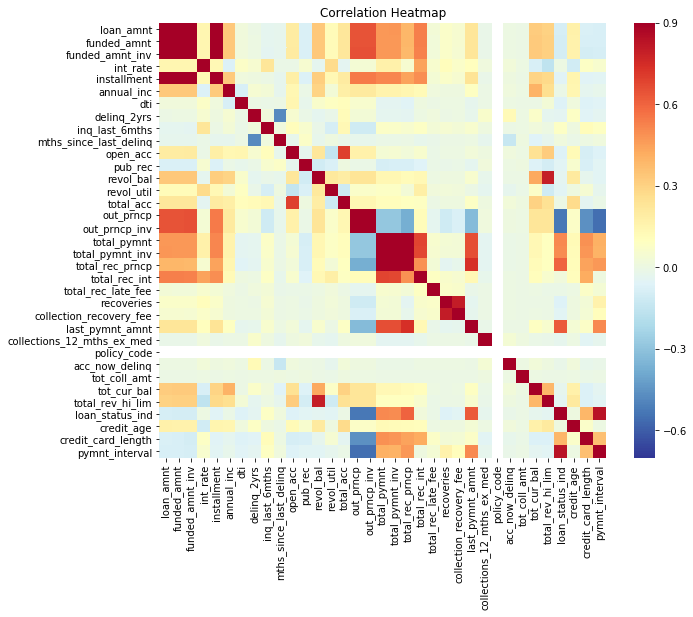

In [24]:
plt.figure(figsize = (10, 8))
loan_corr= loan.corr()
# Heatmap of correlations
sns.heatmap(loan_corr, cmap = plt.cm.RdYlBu_r, vmin = -0.7, annot = False, vmax = 0.9)
plt.title('Correlation Heatmap');

In [25]:
# import packages 
from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Before building the models, let's split the train and test data set and adjust the unbalanced data(since over 90% of the loans are good loans)

In [26]:
##split the training data and the test data
y=loan2["loan_status_ind"]
X=loan2.drop("loan_status_ind",axis=1)
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.33, random_state=42)

In [27]:
# SMOTE technique to adjust the imbalanced data
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(ratio=1.0)
# X_train_r, y_train_r = smote.fit_sample(X_train, y_train)

In [28]:
# assign the model performance score and build the matrix
# since this is a imbalanced problem, I want to focus more on recall and precise
def performance(model,X_train,y_train,X_test,y_test):
    crossval=cross_val_score(model,X_train,y_train,cv=5,scoring='accuracy')
    print("Average Accuracy for train: \t {0:.4f}\n".format(np.mean(crossval)))
    print("Classification Report: \n{}\n".format(classification_report(y_test,model.predict(X_test))))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, model.predict(X_test))))   

Model 1:
logistic regression

In [29]:
##Standardize data

# scaler = StandardScaler()

# Fit on training set only.
# scaler.fit(X_train)

# Apply transform to both the training set and the test set.
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [30]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'

from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(C = 0.0001, random_state=21, solver='sag')
logisticRegr.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=21,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)

In [31]:
performance(logisticRegr,X_train,y_train,X_test,y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

Average Accuracy for train: 	 0.9682

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    220621
           1       0.92      0.96      0.94     72215

   micro avg       0.97      0.97      0.97    292836
   macro avg       0.95      0.97      0.96    292836
weighted avg       0.97      0.97      0.97    292836


Confusion Matrix: 
 [[214484   6137]
 [  2874  69341]]



In [ ]:
# # gridsearch
# param_grid = [{'C': [0.001, 0.01, 0.1, 1, 10, 100] }]
# logistic_grid = GridSearchCV(LogisticRegression(), param_grid)
# logistic_grid.fit(X_train,y_train)
# logistic_grid.best_params_

Model 2: Decision tree

In [32]:
from sklearn import tree
Decisiontree = tree.DecisionTreeClassifier()
Decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
performance(Decisiontree,X_train, y_train, X_test, y_test)

Average Accuracy for train: 	 0.9964

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    220621
           1       0.99      0.99      0.99     72215

   micro avg       1.00      1.00      1.00    292836
   macro avg       1.00      1.00      1.00    292836
weighted avg       1.00      1.00      1.00    292836


Confusion Matrix: 
 [[220099    522]
 [   428  71787]]



Model 3: Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=40, random_state=21)
random_forest.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [35]:
# gridsearch

In [36]:
performance(random_forest,X_train,y_train,X_test,y_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   52.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   47.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]:

Average Accuracy for train: 	 0.9979



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    220621
           1       1.00      1.00      1.00     72215

   micro avg       1.00      1.00      1.00    292836
   macro avg       1.00      1.00      1.00    292836
weighted avg       1.00      1.00      1.00    292836




[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished


Confusion Matrix: 
 [[220435    186]
 [   357  71858]]



In [ ]:
 # Extract feature importances
# feature_importance_values = random_forest.feature_importances_
# feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
# feature_importances.sort_values(by = ['importance'],ascending = False)

Model4: NeroNetwork

In [37]:
from sklearn.neural_network import MLPClassifier

neuralnet = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
neuralnet.fit(X_train, y_train)                         

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [38]:
# gridsearch

In [39]:
performance(neuralnet,X_train,y_train,X_test,y_test)

Average Accuracy for train: 	 0.8646



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report: 
              precision    recall  f1-score   support

           0       0.75      1.00      0.86    220621
           1       0.00      0.00      0.00     72215

   micro avg       0.75      0.75      0.75    292836
   macro avg       0.38      0.50      0.43    292836
weighted avg       0.57      0.75      0.65    292836


Confusion Matrix: 
 [[220621      0]
 [ 72215      0]]



Model 5: Adaboost

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [41]:
# gridsearch

In [42]:
performance(bdt,X_train,y_train,X_test,y_test)

Average Accuracy for train: 	 0.9954

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    220621
           1       0.99      0.99      0.99     72215

   micro avg       1.00      1.00      1.00    292836
   macro avg       0.99      0.99      0.99    292836
weighted avg       1.00      1.00      1.00    292836


Confusion Matrix: 
 [[219816    805]
 [   548  71667]]

